In [1]:
# Data management
import pandas as pd

# Math and Stat modules
import numpy as np

# Data preprocessing and trasformation (ETL)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

#Imputer
from sklearn.impute import SimpleImputer

#Supervised Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve, cross_validate
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Visualization
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
import seaborn as sns

In [2]:
dataset = pd.read_csv("data/marketing_campaign.csv", sep=";")

In [3]:
dataset.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Droppiamo le 3 colonne che non ci servono:
- ID
- Z_CostContact
- Z_Revenue

In [5]:
dataset.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

Guardo quanto è sbilanciato il mio dataset

In [6]:
dataset['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

Prendo le Label

In [7]:
dataset_label = dataset['Response'].values
dataset.drop(columns=['Response'], inplace=True)

## Pipeline

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>],
       [<AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>],
       [<AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>],
       [<AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>],
       [<AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>],
       [<AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <AxesSubplot:title={'center':'AcceptedCmp4'}>]

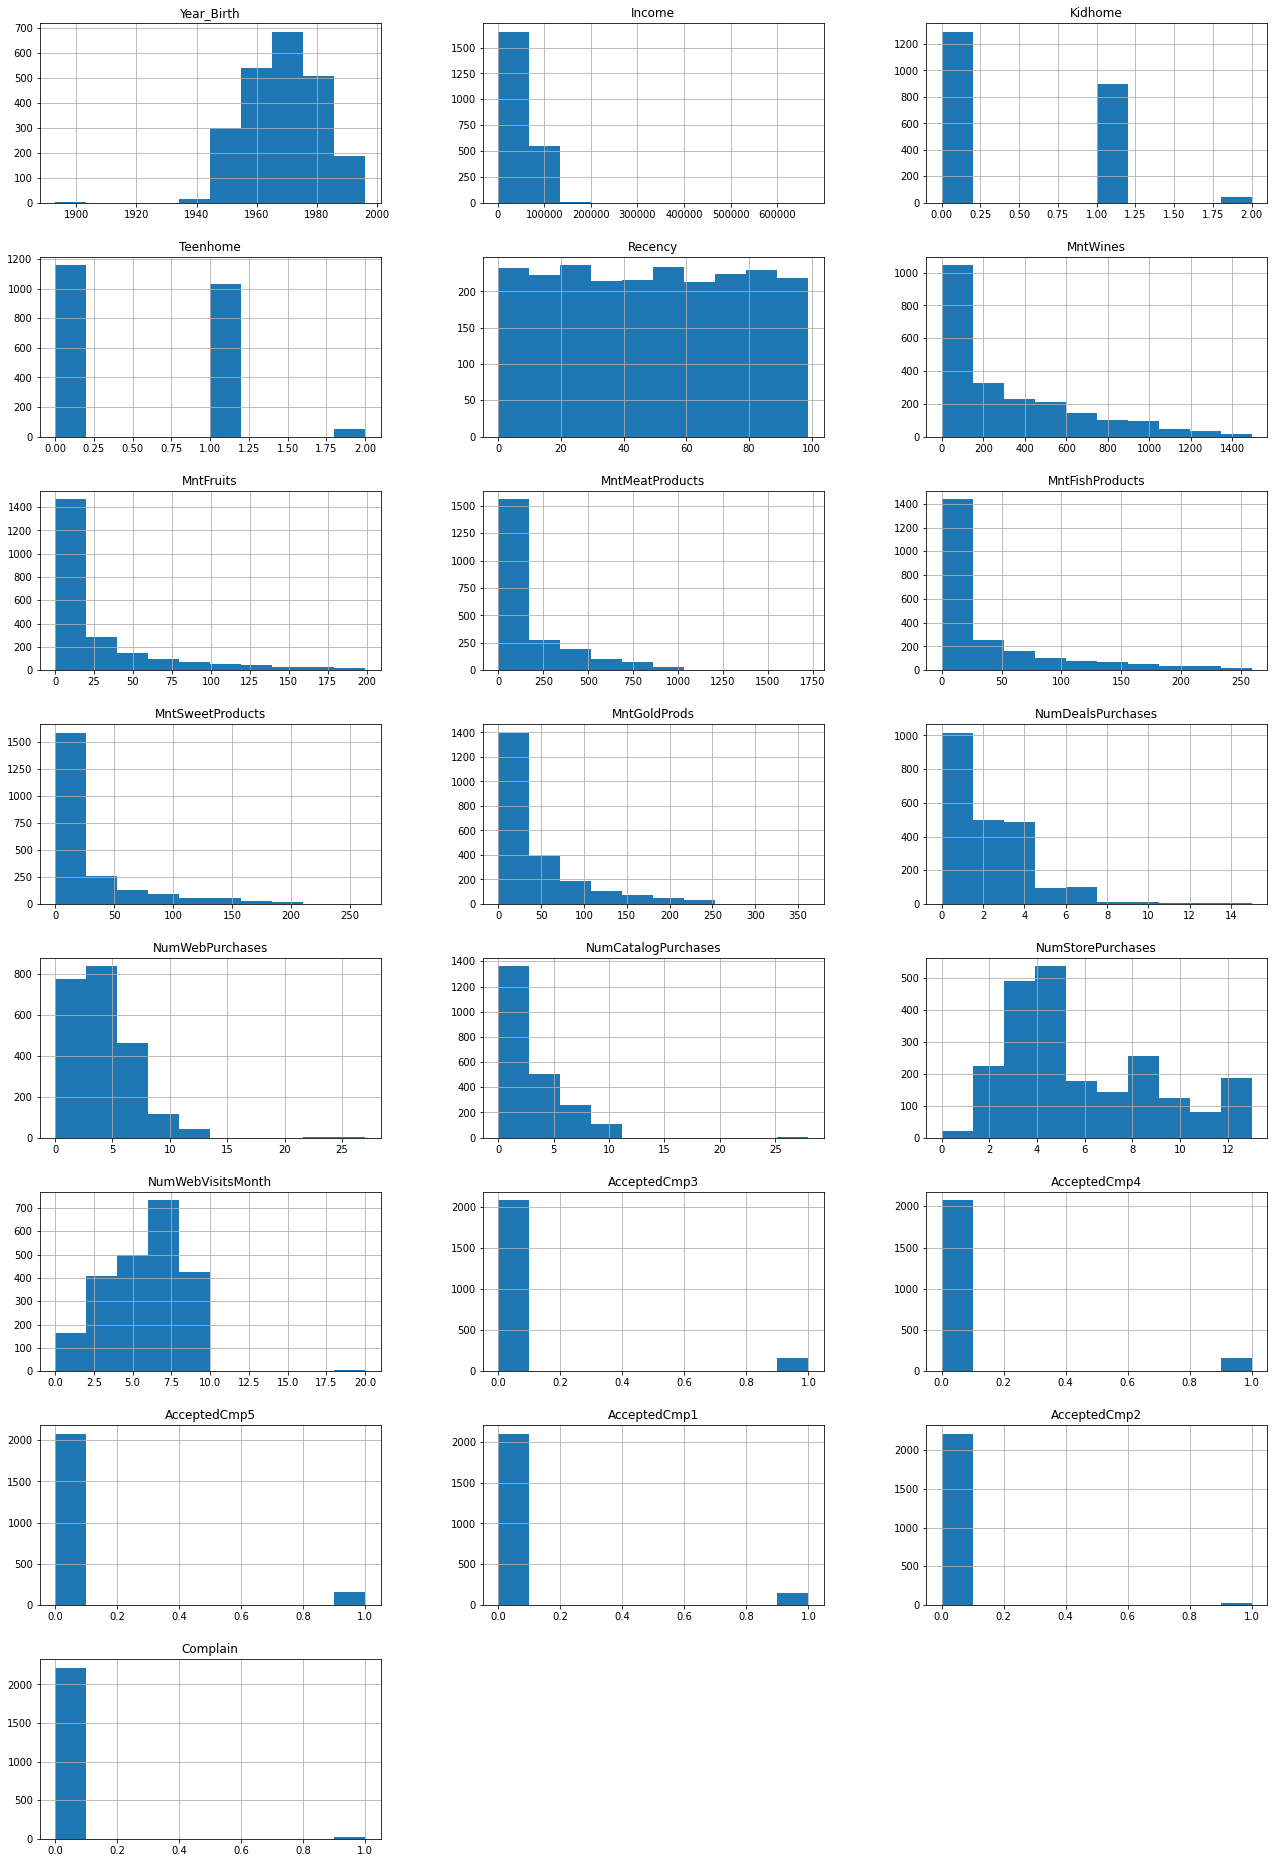

In [8]:
dataset.hist(figsize=(22,42), layout=(10, 3))

In [9]:
class DateTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, startDate = pd.to_datetime("2015-01-01")):
        self.startDate = startDate
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_new = pd.to_datetime(X.iloc[:,0])
        X_new = pd.DataFrame((self.startDate - X_new).transform(lambda days: days.total_seconds()/(60*60*24*30)))
        return X_new

In [10]:
income_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

date_pipeline = Pipeline([
    ('transformer', DateTransformer()),
    ('scaler', StandardScaler())
])

In [11]:
robust_features = ['Year_Birth', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases']
standard_features = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumStorePurchases']

data_preprocessing = ColumnTransformer([
    ('robust', MinMaxScaler(), standard_features),
    ('cat', OneHotEncoder(), ['Education', 'Marital_Status']),
    ('standard', MinMaxScaler(), robust_features),
    ('income', income_pipeline, ['Income']),
    ('dateSubscription', date_pipeline, ["Dt_Customer"])
],
    remainder = 'passthrough'
)

In [12]:
feature_matrix = data_preprocessing.fit_transform(dataset)

Ricreo nomi colonne

In [13]:
# columns_name = robust_features
# for c in ['Education', 'Marital_Status']:
#     cat_inc_name = [c+f"_cat{i}" for i in range(1,len(dataset[c].unique()))]
#     columns_name.extend(cat_inc_name)
# columns_name.extend(standard_features)
# columns_name.extend(dataset.columns.difference(columns_name))
# columns_name

## Test and Training set

Prendo le label e elimino quella colonna dal dataset.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, dataset_label, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((1568, 36), (672, 36))

In [15]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train) # apprendo su training
predicted_test = perceptron.predict(X_test) # predico sul test
np.sum(predicted_test == y_test)/len(y_test)

0.8125

In [16]:
p = Perceptron()
p_score = cross_val_score(p, X_train, y_train, cv = 5).mean()
p_score

0.8431452351397001

In [17]:
# Ci dice per ogni record che prediction ha ricevuto quando faceva parte del validation set
#cross_val_predict(perceptron, X_train, y_train, cv = 5)

In [18]:
kf = KFold(n_splits=10)
kf_score = cross_val_score(p, X_train, y_train, cv = kf).mean()
kf_score

0.8520088192062716

In [19]:
rkf = RepeatedKFold(n_splits=5, n_repeats=4)
rkf_score = cross_val_score(p, X_train, y_train, cv = rkf).mean()
rkf_score

0.8502925255896298

In [20]:
spf = ShuffleSplit(n_splits = 10, test_size = 0.25)
spf_score = cross_val_score(p, X_train, y_train, cv = spf, n_jobs=-1).mean()
spf_score

0.8318877551020407

Abbiamo un dataset molto sbilanciato. Provo con StratifiedKFold.

In [21]:
pd.DataFrame(dataset_label).value_counts()

0    1906
1     334
dtype: int64

In [22]:
skf = StratifiedKFold(n_splits=10)
skf_score = cross_val_score(p, X_train, y_train, cv = skf, n_jobs=-1).mean()
skf_score

0.818916380859056

In [23]:
ssf = StratifiedShuffleSplit(n_splits=10)
ssf_score = cross_val_score(p, X_train, y_train, cv = ssf, n_jobs=-1).mean()
ssf_score

0.8471337579617835

Provo a confrontare con dei DummyClassifier il Perceptron.

In [24]:
mf_dum_cls = DummyClassifier(strategy='most_frequent')
uni_dum_cls = DummyClassifier(strategy='uniform')
st_dum_cls = DummyClassifier(strategy='stratified')

mf_score = cross_val_score(mf_dum_cls, X_train, y_train, cv=10, scoring='accuracy').mean()
uni_score = cross_val_score(uni_dum_cls, X_train, y_train, cv=10, scoring='accuracy').mean()
st_score = cross_val_score(st_dum_cls, X_train, y_train, cv=10, scoring='accuracy').mean()

print("---------- Dummy Classifiers ----------\n")
print("Most frequent score:", mf_score)
print("Uniform score:", uni_score)
print("Stratified score:", st_score)
print("\n---------- Serious Classifiers ----------\n")
print("Perceptron score:", p_score)
print("KFold score:", kf_score)
print("Repeated KFold score:", rkf_score)
print("Shuffle Split score:", spf_score)
print("Stratified KFold score:", skf_score)
print("Stratified Shuffle Split score:", ssf_score)

---------- Dummy Classifiers ----------

Most frequent score: 0.8475788012412216
Uniform score: 0.503756328597093
Stratified score: 0.7193532582067614

---------- Serious Classifiers ----------

Perceptron score: 0.8431452351397001
KFold score: 0.8520088192062716
Repeated KFold score: 0.8502925255896298
Shuffle Split score: 0.8318877551020407
Stratified KFold score: 0.818916380859056
Stratified Shuffle Split score: 0.8471337579617835


Analizziamo le performance con matrice di confusione, precison, recall e f1.

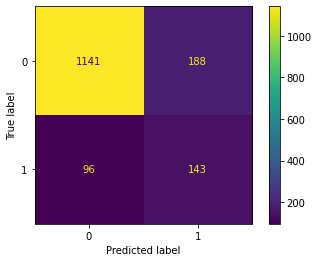

In [25]:
y_train_predicted = cross_val_predict(p, X_train, y_train, cv = 10)
cm = confusion_matrix(y_train, y_train_predicted)
cm_display = ConfusionMatrixDisplay(cm).plot()

Vediamo le performance del perceptron confrontate ai dummy classifier.

In [26]:
y_train_mf = cross_val_predict(mf_dum_cls, X_train, y_train, cv = 10)
y_train_un = cross_val_predict(uni_dum_cls, X_train, y_train, cv = 10)
y_train_st = cross_val_predict(st_dum_cls, X_train, y_train, cv = 10)

print("------------ Perceptron ------------", "\nPrecision:", precision_score(y_train, y_train_predicted), "\nRecall:", recall_score(y_train, y_train_predicted), "\nf1:", f1_score(y_train, y_train_predicted))
print("\n------------ Most frequent ------------", "\nPrecision:", precision_score(y_train, y_train_mf), "\nRecall:", recall_score(y_train, y_train_mf), "\nf1:", f1_score(y_train, y_train_mf))
print("\n------------ Uniform ------------", "\nPrecision:", precision_score(y_train, y_train_un), "\nRecall:", recall_score(y_train, y_train_un), "\nf1:", f1_score(y_train, y_train_un))
print("\n------------ Stratified ------------", "\nPrecision:", precision_score(y_train, y_train_st), "\nRecall:", recall_score(y_train, y_train_st), "\nf1:", f1_score(y_train, y_train_st))

------------ Perceptron ------------ 
Precision: 0.43202416918429004 
Recall: 0.5983263598326359 
f1: 0.5017543859649123

------------ Most frequent ------------ 
Precision: 0.0 
Recall: 0.0 
f1: 0.0

------------ Uniform ------------ 
Precision: 0.15649867374005305 
Recall: 0.49372384937238495 
f1: 0.23766364551863042

------------ Stratified ------------ 
Precision: 0.15416666666666667 
Recall: 0.15481171548117154 
f1: 0.1544885177453027


c:\users\marco\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Metti max_iter=100 e guarda link su preprocessing
logit_cls = LogisticRegression(max_iter=1000)
y_scores = cross_val_predict(logit_cls, X_train, y_train, cv = 5, method='decision_function')

In [28]:
prec, recall, soglia = precision_recall_curve(y_train, y_scores)

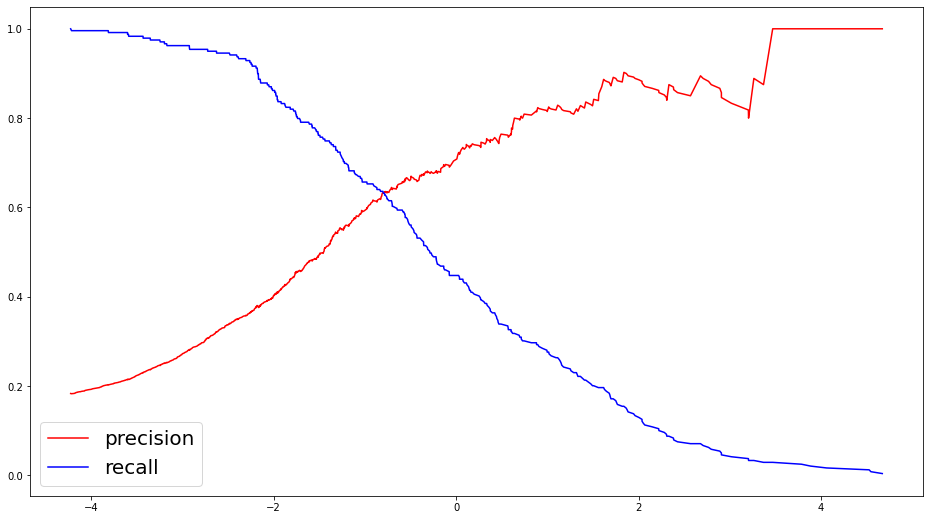

In [29]:
fig_prc = plt.figure(figsize=(16,9))
ax = fig_prc.add_subplot()
ax.plot(soglia, prec[:-1], 'r', label = 'precision')
ax.plot(soglia, recall[:-1], 'b', label = 'recall')
ax.legend(fontsize=20)

Text(0, 0.5, 'Precision')

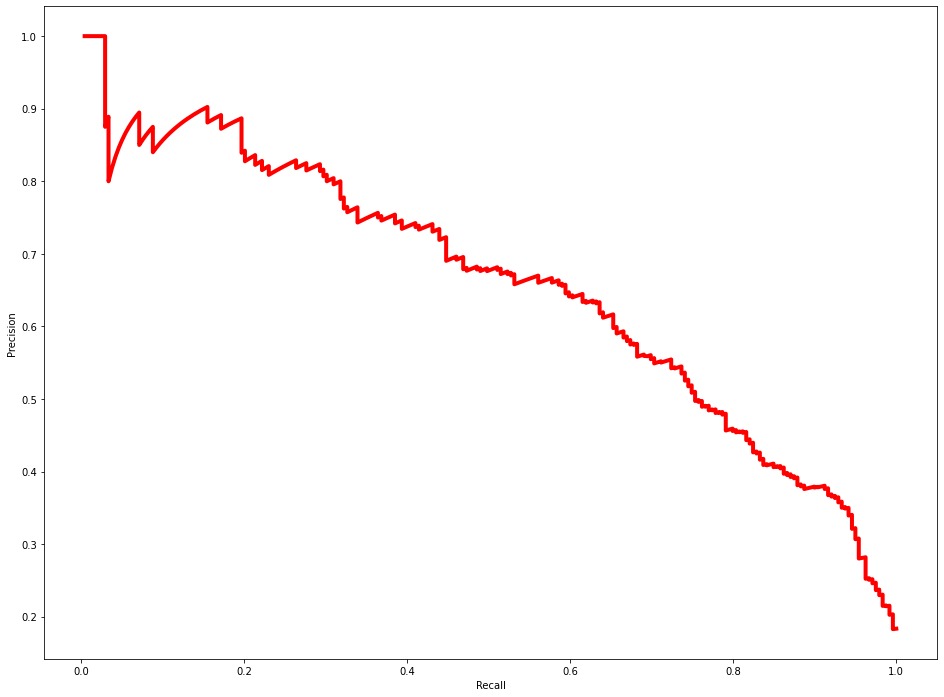

In [30]:
fig_prf = plt.figure(figsize=(16,12))
ax = fig_prf.add_subplot()
ax.plot(recall[:-1], prec[:-1], 'r', label = 'precision', lw = 4)
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

In [31]:
soglia_prec_90 = soglia[np.argmax(prec >= 0.9)]
y_predicted_score = y_scores >= soglia_prec_90
precision_score(y_train, y_predicted_score), recall_score(y_train, y_predicted_score), f1_score(y_train, y_predicted_score)

(0.9024390243902439, 0.15481171548117154, 0.26428571428571423)

Text(0, 0.5, 'Recall')

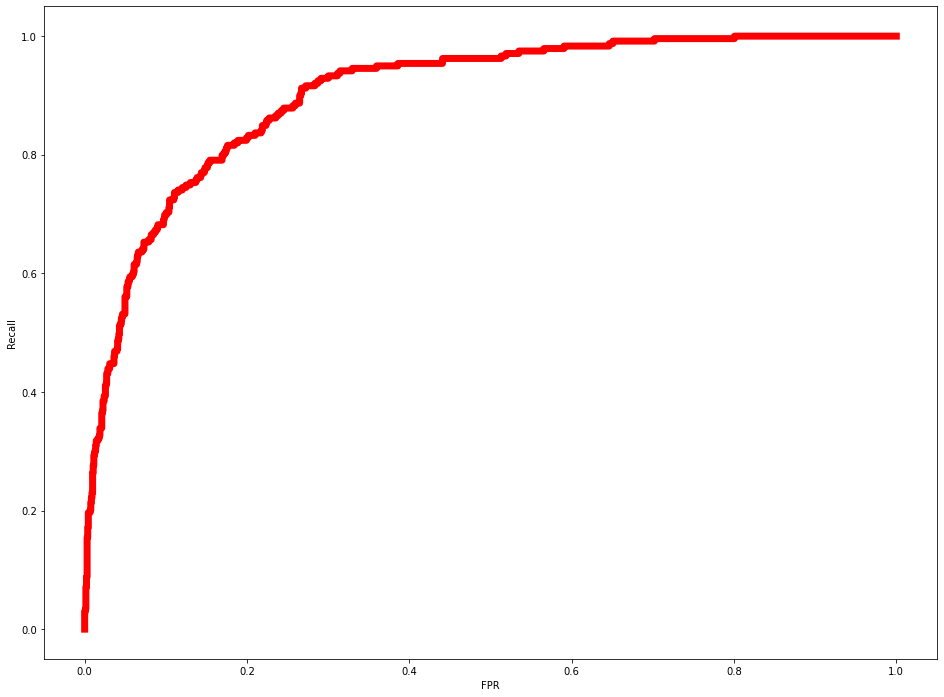

In [32]:
fpr, recall, soglia = roc_curve(y_train, y_scores)

fig_roc = plt.figure(figsize=(16,12))
ax = fig_roc.add_subplot()
ax.plot(fpr, recall, 'r', label = 'recall', lw = 7)
ax.set_xlabel("FPR")
ax.set_ylabel("Recall")

Learning curve

In [33]:
train_sizes, train_scores, test_scores = learning_curve(logit_cls,
                                                       X=feature_matrix,
                                                       y=dataset_label,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 10,
                                                       n_jobs = -1,
                                                       shuffle = True)

(0.6, 1.03)

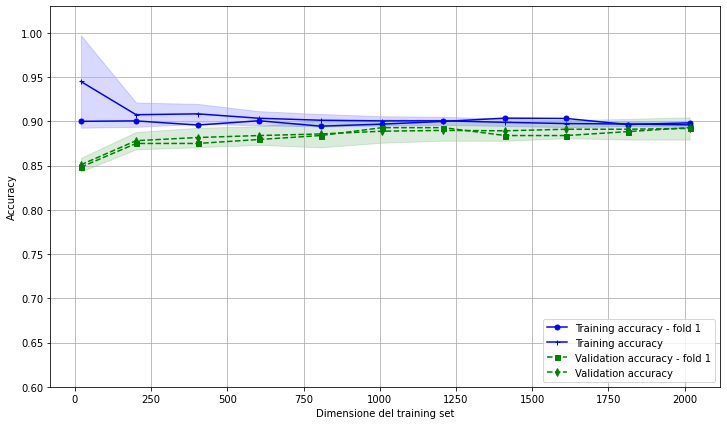

In [34]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(train_sizes, train_scores[:,0],
         color='blue', marker='o',
         markersize=5, label='Training accuracy - fold 1')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_scores[:,0],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy - fold 1')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Dimensione del training set')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.6, 1.03])

In [35]:
range_C = [0.001,0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(logit_cls, X=feature_matrix, y=dataset_label, param_range=range_C, param_name='C',cv=10, n_jobs=-1)

(0.0, 1.03)

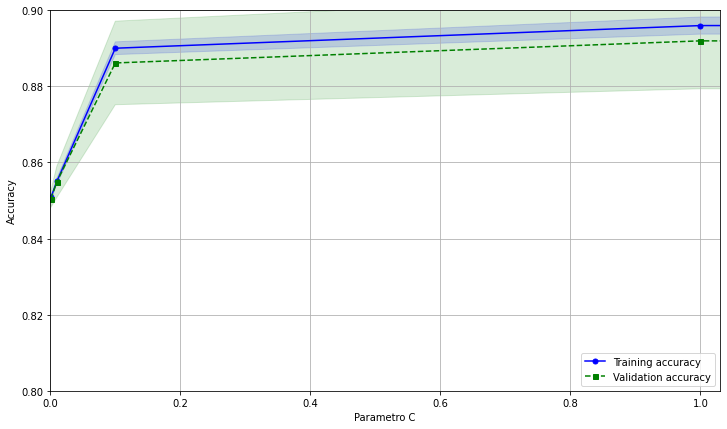

In [36]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_C, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_C,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_C, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_C,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parametro C')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.8, 0.9])
ax.set_xlim([0., 1.03])

## Support Vector Machine

Training SVM per C = 0.01 0
Training per 0.01 finito
Training SVM per C = 0.1 1
Training per 0.1 finito
Training SVM per C = 1 2
Training per 1 finito
Training SVM per C = 10 3
Training per 10 finito
Training SVM per C = 100 4
Training per 100 finito


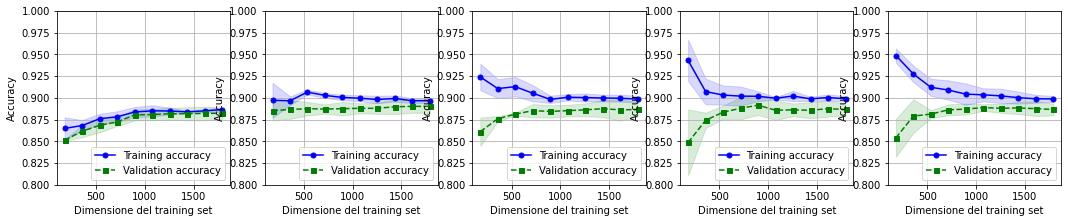

In [37]:
Cs = [0.01, 0.1, 1, 10, 100]# definire un insieme di valori di C tenendo in considerazione le precedenti osservazioni sul suo effetto 
fig = plt.figure(figsize=(18,3.2))
for i, c in enumerate(Cs):
    print('Training SVM per C =', c, i)
    svm_cls = LinearSVC(C = c, max_iter=50000)
    train_sizes, train_scores, test_scores = learning_curve(svm_cls, X = feature_matrix, y = dataset_label, train_sizes=np.linspace(0.1,1,10), cv = 5, n_jobs=-1, shuffle = True)
    

    print('Training per {} finito'.format(c))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    ax = fig.add_subplot(150+(i+1))
    ax.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
    ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_xlabel('Dimensione del training set')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')

In [38]:
gamma1, gamma2 = 0.1, 2
C1, C2 = 0.01, 5
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = SVC(kernel="rbf", gamma = gamma, C = C)
    train_size, train_scores, test_scores = learning_curve(rbf_kernel_svm_clf,
                                                       X=feature_matrix,
                                                       y=dataset_label,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=5,
                                                       n_jobs=-1)
    print('fatto {},{}'.format(gamma,C))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto 0.1,0.01
fatto 0.1,5
fatto 2,0.01
fatto 2,5


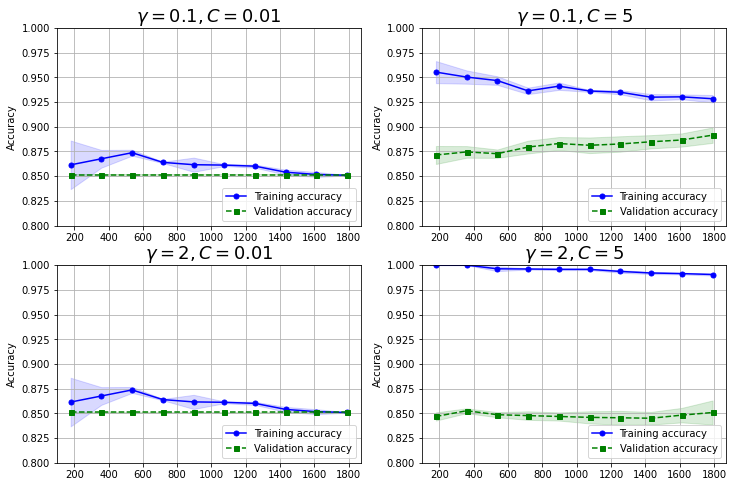

In [39]:
fig= plt.figure(figsize=(12, 8))
for i in range(4):
    ax = fig.add_subplot(221+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"$\gamma={}, C={}$".format(*hyperparams[i]), fontsize=18)

## Alberi di decisione

In [40]:
min_leaf = [5, 10, 100, 200, 350]

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for mlf in min_leaf:
    dt_mlf = DecisionTreeClassifier(min_samples_leaf=mlf, random_state=42, max_depth=15)
    train_size, train_scores, test_scores = learning_curve(dt_mlf,
                                                       X=feature_matrix,
                                                       y=dataset_label,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=10,
                                                       n_jobs=-1)
    print('fatto {}'.format(mlf))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto 5
fatto 10
fatto 100
fatto 200
fatto 350


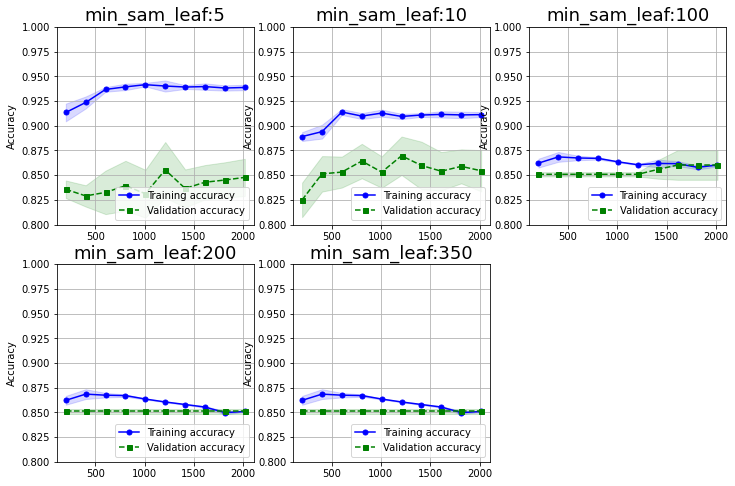

In [41]:
fig= plt.figure(figsize=(12, 8))
for i in range(5):
    ax = fig.add_subplot(231+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"min_sam_leaf:{}".format(min_leaf[i]), fontsize=18)

## Ensemble methods

In [42]:
def visualize_ensemble_performance(ax, X, y, scores, scoring):
    data_score = []
    labels = []
    for clf in scores['estimator'][0].estimators_:
        scores_clf = cross_validate(clf, X, y,
                        cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=42),
                        return_train_score= True,
                        scoring = scoring,
                        n_jobs=-1)
        data_score.extend([scores_clf[t+s] for s in scoring for t in ['train_','test_']])
        labels.extend([clf.__class__.__name__+'_'+t+s for s in scoring for t in ['train_','test_']])
    data_score.extend([scores[t+s] for s in scoring for t in ['train_','test_']])
    labels.extend(['Voting_'+t+s for s in scoring for t in ['train_','test_']])
    sns.boxplot(ax = ax,
                data = data_score,
                whis = [5, 95],
                palette = "vlag",
                orient = 'h'
               )
    ax.set(yticklabels=labels)

In [43]:
log_clf = LogisticRegression(random_state=42)
svm_clf = SVC(random_state=42)
per_clf = Perceptron(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('pc', per_clf), ('svc', svm_clf)],
    voting='hard')

In [44]:
scores = cross_validate(voting_clf, feature_matrix, dataset_label,
                        cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=42),
                        return_estimator = True,
                        return_train_score= True,
                        scoring = ['recall','accuracy','f1'],
                        n_jobs=-1)

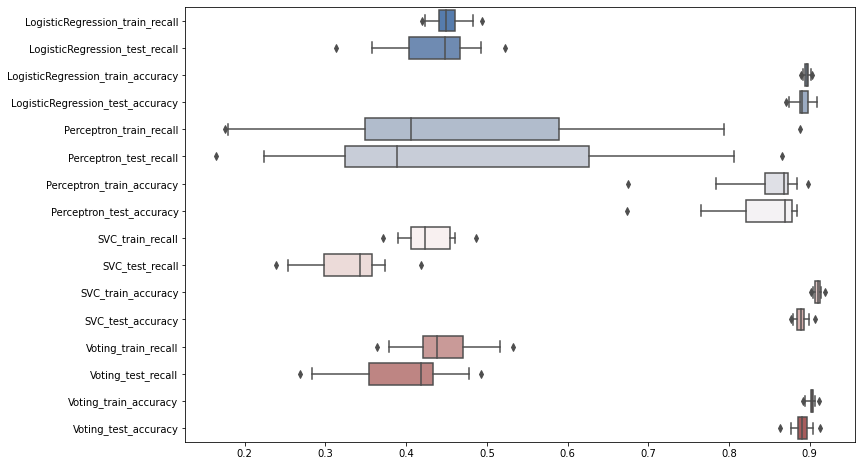

In [45]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
visualize_ensemble_performance(ax, feature_matrix, dataset_label, scores, ['recall','accuracy'])

In [46]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=500, max_samples=200, bootstrap=True, n_jobs=-1)
dt_clf = DecisionTreeClassifier(min_samples_leaf=100, random_state=42, max_depth=15)

In [47]:
train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for clf in [bag_clf, dt_clf]:
    train_size, train_scores, test_scores = learning_curve(clf,
                                                       X=feature_matrix,
                                                       y=dataset_label,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
                                                       n_jobs=-1)
    print('fatto {}'.format(clf))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=200, n_estimators=500, n_jobs=-1)
fatto DecisionTreeClassifier(max_depth=15, min_samples_leaf=100, random_state=42)


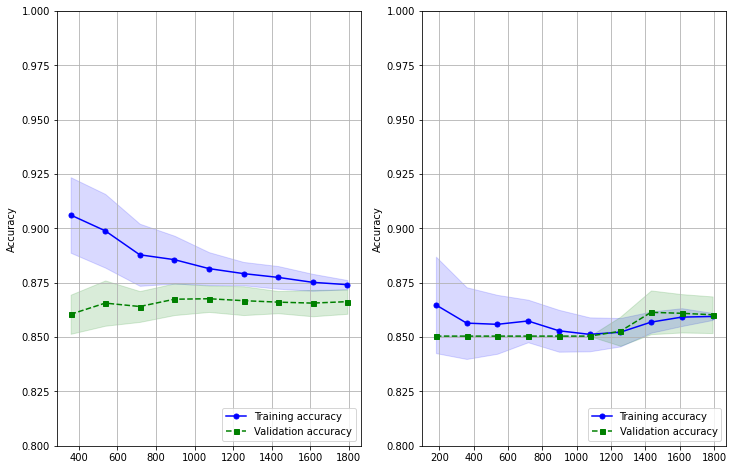

In [48]:
fig= plt.figure(figsize=(12, 8))
for i in range(2):
    ax = fig.add_subplot(121+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')

## Random Forest

In [49]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, dataset_label, test_size=0.2, stratify=dataset_label)
len(y_train[y_train == 1])/len(y_train), len(y_test[y_test == 1])/len(y_test)

(0.14899553571428573, 0.14955357142857142)

In [50]:
rnf_clf = RandomForestClassifier(n_estimators=250, max_leaf_nodes=64, n_jobs=-1, max_features=10)
et_clf = ExtraTreesClassifier(n_estimators=250, max_leaf_nodes=64, n_jobs=-1, max_features=10)
scores_rnf = cross_val_score(rnf_clf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
scores_et = cross_val_score(et_clf, X_train, y_train, cv=5, scoring='f1',n_jobs=-1)

[[Text(0, 0, 'RF'), Text(0, 1, 'ET')], Text(0.5, 0, 'f1')]

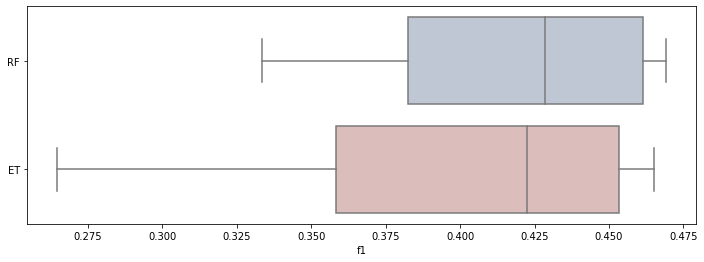

In [51]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
sns.boxplot(ax = ax,
            data = [scores_rnf, scores_et],
            palette = 'vlag',
            orient = 'h'
           )
ax.set(yticklabels=['RF','ET'], xlabel="f1")

In [52]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=6),
    n_estimators=250,
    algorithm='SAMME.R',
    learning_rate=0.5
)
scores_ada = cross_val_score(ada_clf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)

[[Text(0, 0, 'RF'), Text(0, 1, 'ET'), Text(0, 2, 'ADA')]]

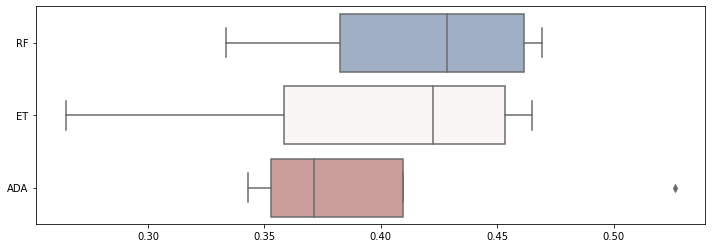

In [53]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
sns.boxplot(ax = ax,
            data = [scores_rnf, scores_et, scores_ada],
            palette = 'vlag',
            orient = 'h'
           )
ax.set(yticklabels=['RF','ET','ADA'])